In [47]:
import numpy as np
import scipy

1. In class, we discussed deflategate, and analyzed whether the New England Patriots cheated in 2015. We used the statistic that was the mean value of the balls for each team. Choose a different statistic and create a jupyter notebook that repeats the analysis for the new statistic. Briefly justify your choice of statistic.

Repeat the analysis with: the difference between the Overall Average Drop and the Average Drop of the Patriots.

In [78]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [79]:
#read csv
football = Table.read_table('football.csv')
football.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Ball,Blakeman,Prioleau
Patriots 1,11.5,11.8
Patriots 2,10.85,11.2
Patriots 3,11.15,11.5
Patriots 4,10.7,11
Patriots 5,11.1,11.45
Patriots 6,11.6,11.95
Patriots 7,11.85,12.3
Patriots 8,11.1,11.55
Patriots 9,10.95,11.35
Patriots 10,10.5,10.9


In [82]:
#get mean pressure
football = football.with_column('Combined',(football.column(1)+football.column(2))/2)
football.show()

Ball,Blakeman,Prioleau,Combined
Patriots 1,11.5,11.8,11.65
Patriots 2,10.85,11.2,11.025
Patriots 3,11.15,11.5,11.325
Patriots 4,10.7,11,10.85
Patriots 5,11.1,11.45,11.275
Patriots 6,11.6,11.95,11.775
Patriots 7,11.85,12.3,12.075
Patriots 8,11.1,11.55,11.325
Patriots 9,10.95,11.35,11.15
Patriots 10,10.5,10.9,10.7


In [83]:
patriots = football.where('Ball', are.containing('Patriots'))
patriots = patriots.with_column('Drop', 12.5-patriots.column('Combined'))
patriots.show()

Ball,Blakeman,Prioleau,Combined,Drop
Patriots 1,11.5,11.8,11.65,0.85
Patriots 2,10.85,11.2,11.025,1.475
Patriots 3,11.15,11.5,11.325,1.175
Patriots 4,10.7,11,10.85,1.65
Patriots 5,11.1,11.45,11.275,1.225
Patriots 6,11.6,11.95,11.775,0.725
Patriots 7,11.85,12.3,12.075,0.425
Patriots 8,11.1,11.55,11.325,1.175
Patriots 9,10.95,11.35,11.15,1.35
Patriots 10,10.5,10.9,10.7,1.8


In [84]:
colts = football.where('Ball', are.containing('Colts'))
colts = colts.with_column('Drop', 13.0-colts.column('Combined'))
colts

Ball,Blakeman,Prioleau,Combined,Drop
Colts 1,12.7,12.35,12.525,0.475
Colts 2,12.75,12.3,12.525,0.475
Colts 3,12.5,12.95,12.725,0.275
Colts 4,12.55,12.15,12.35,0.65


In [88]:
patriots_mean = patriots.column('Drop').mean()
patriots_mean

1.202272727272728

In [86]:
overall_mean = (np.sum(patriots.column('Drop'))+np.sum(colts.column('Drop')))/(patriots.column('Drop').shape[0]+colts.column('Drop').shape[0])
overall_mean

1.0066666666666673

In [91]:
#observed statistic = patriots_mean - overall_mean
observed_statistic = patriots_mean - overall_mean
observed_statistic

0.19560606060606078

Null hypothesis.
The Patriots' drops are like a random sample of 11 out of all 15 drops. The average came out higher than that of the Colts' drops due to chance variation.

Alternative hypotheis.
The Patriots' drops are too large to be the result of chance variation alone.

If the null hypothesis were true, then the Patriots' drops would be comparable to 11 drops drawn at random without replacement from all 15 drops. So let's create an array of all 15 drops and draw at random from it.


In [92]:
drops = Table().with_column(
'Drop', np.append(patriots.column('Drop'),
colts.column('Drop'))
)
drops.show()

Drop
0.85
1.475
1.175
1.65
1.225
0.725
0.425
1.175
1.35
1.8


In [93]:
#do experiment for 10000 times, sample without repalcement
#new_statistic = patriots_mean - overall_mean
#no need to compute overall mean again
simulated_statistics = make_array()
repetitions = 10000
for i in np.arange(repetitions):
  shuffled = drops.sample(with_replacement=False)
  new_patriots_mean = shuffled.take(np.arange(11)).column(0).mean()
  new_statistic = new_patriots_mean - overall_mean
  simulated_statistics = np.append(simulated_statistics, new_statistic)

In [94]:
empirical_P = np.count_nonzero(simulated_statistics >= observed_statistic)/repetitions
empirical_P

0.0032

Observed Statistic: 0.19560606060606078
Empirical P: 0.0032


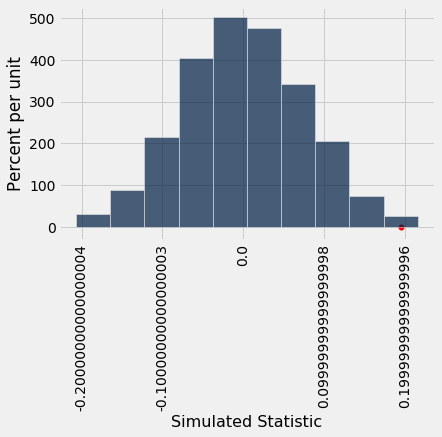

In [96]:
print('Observed Statistic:', observed_statistic)
print('Empirical P:', empirical_P)
results = Table().with_column('Simulated Statistic', simulated_statistics)
results.hist()
plt.scatter(observed_statistic, 0, color='red', s=30);

The observed value of the test statistic is quite far away from the heart of the distribution. By any reasonable cutoff for what is "small", the empirical P-value is small. 

So we end up rejecting the null hypothesis of randomness, and conclude that the Patriots drops were too large to reflect chance variation alone.



2. Write a function that computes the correlation coefficient r. Your input should two arrays x and y, and you should return the r value. Don’t use a package that already contains an r method, write code that implements the definition.

r = cov(x,y) / (Std(x)*Std(y))

 = SUM(xi - Avg(x)) * (yi - Avg(y)) / (Std(x) * Std(y) * (n-1))

In [75]:
def compute_r(x,y):
    mean_x,mean_y=np.mean(x),np.mean(y)
    cov=0
    for i,xi in enumerate(x):
        cov+=(xi-mean_x)*(y[i]-mean_y)
    return cov/(np.std(x)*np.std(y)*len(x))

In [76]:
#compute covariance
def compute_cov(x,y):
    mean_x,mean_y=np.mean(x),np.mean(y)
    cov=0
    for i,xi in enumerate(x):
        cov+=(xi-mean_x)*(y[i]-mean_y)
    return cov/len(x)

In [77]:
#do experiment
a=[1,2,3,8,5,3,5,7,2]
b=[3,2,1,8,4,3,6,4,3]
print('Pearson R:',compute_r(a,b))
print('Covariance:',compute_cov(a,b))

Pearson R: 0.7665298003226024
Covariance: 3.4444444444444446


In [61]:
#compare the result to the functions in scipy package
print('Pearson R from scipy package:',scipy.stats.pearsonr(a,b)[0])

Pearson R from scipy package: 0.7665298003226024


3. Use the correlation coefficient function you wrote to answer the following questions:

(a) What happens to r if you double each of the values in your data. How does this compare to what happens to the covariance?

In [62]:
#double data
a,b=np.array(a),np.array(b)
a2=a*2
b2=b*2
a2,b2

(array([ 2,  4,  6, 16, 10,  6, 10, 14,  4]),
 array([ 6,  4,  2, 16,  8,  6, 12,  8,  6]))

In [63]:
print('Pearson R, double value:',compute_r(a2,b2))
print('Covariance, double value:',compute_cov(a2,b2))

Pearson R, double value: 0.7665298003226024
Covariance, double value: 13.777777777777779


In [64]:
compute_cov(a2,b2)/compute_cov(a,b)

4.0

The Pearson R value stay the same after double each element, while the covariance is 4(2 to the power of 2) times of the original value

(b) What happens to r is you add 100 to each value in your data set. How does this compare to what happens to the covariance?

In [65]:
#add 100 to each value
a+=100
b+=100
a,b

(array([101, 102, 103, 108, 105, 103, 105, 107, 102]),
 array([103, 102, 101, 108, 104, 103, 106, 104, 103]))

In [66]:
print('Pearson R, add 100 to value:',compute_r(a,b))
print('Covariance, add 100 to value:',compute_cov(a,b))

Pearson R, add 100 to value: 0.7665298003226023
Covariance, add 100 to value: 3.4444444444444446


Both the Pearson R value and covariance value stay the same after add 100 to each element